In [2]:
import re
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import cv2
import numpy as np

In [3]:
natural_keys = lambda text: [int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text)]
frame_paths0 = sorted(glob(os.path.join("data/drone_dataset/dev0/", "Dev0_Image_w1920_h1200_fn*.jpg")), key=natural_keys)

frame_paths0

['data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn1.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn2.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn3.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn4.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn5.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn6.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn7.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn8.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn9.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn10.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn11.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn12.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn13.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn14.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn15.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_fn16.jpg',
 'data/drone_dataset/dev0/Dev0_Image_w1920_h1200_

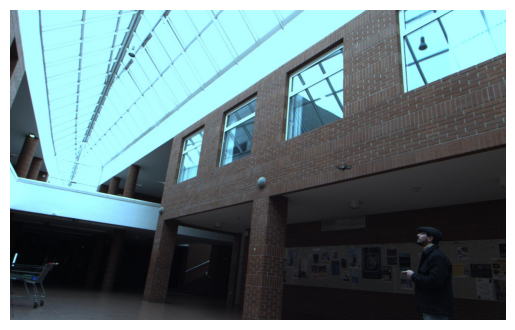

In [4]:
fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second

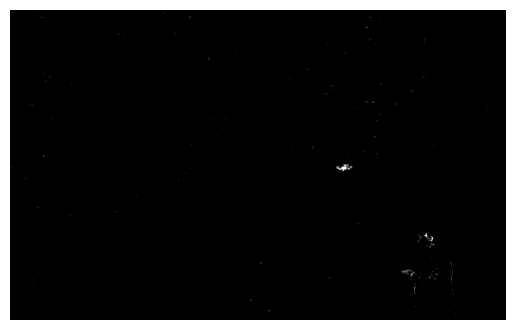

In [8]:
background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    
    
    ax.imshow(fg_mask, cmap='gray')
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second



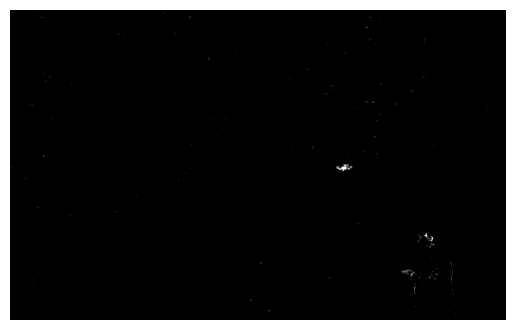

In [9]:
background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    _, thresh = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)
    
    ax.imshow(fg_mask, cmap='gray')
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second



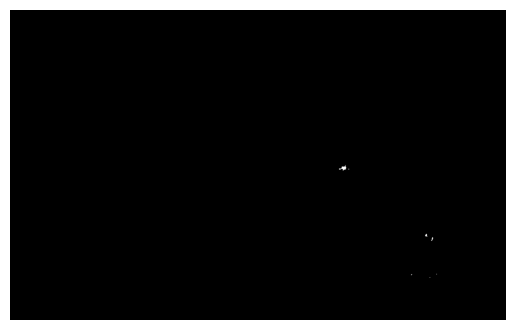

In [10]:
background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    _, thresh = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    ax.imshow(cleaned, cmap='gray')
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second



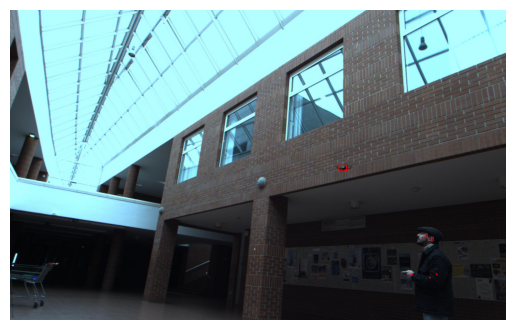

In [11]:
background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    _, thresh = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        rects.append([x, y, x + w, y + h])

    
    for (x1, y1, x2, y2) in rects:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    
    
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second



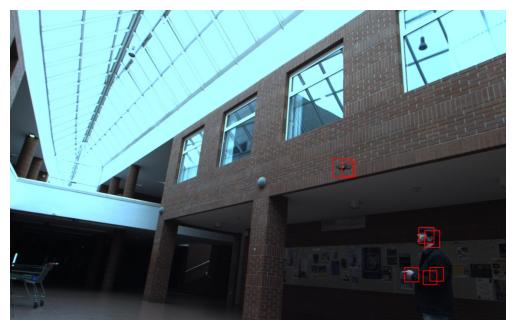

In [13]:
      
background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    _, thresh = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        rects.append([x, y, x + w, y + h])
    
    
    
    # Cluster close rectangles
    if len(rects) > 1:
        # add pixels to each side (margin)
        added = 100
        rects = np.array([[x1 - added//4, y1 - added//4, x2 + added//4, y2 + added//4] for x1, y1, x2, y2 in rects])
        rects[rects < 0] = 0 # if any of the coordinate became negative make it 0
       
    
    
    
    for (x1, y1, x2, y2) in rects:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    
    
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second


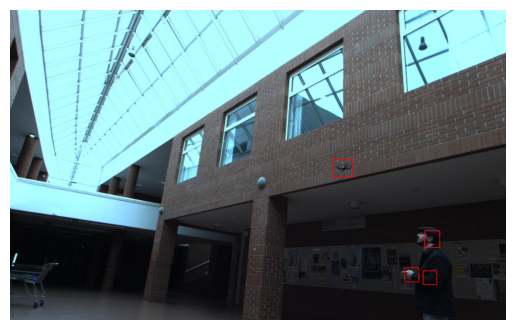

In [14]:
from imutils.object_detection import non_max_suppression as nms

background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    _, thresh = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        rects.append([x, y, x + w, y + h])
    
    
    
    # Cluster close rectangles
    if len(rects) > 1:
        # add pixels to each side (margin)
        added = 100
        rects = np.array([[x1 - added//4, y1 - added//4, x2 + added//4, y2 + added//4] for x1, y1, x2, y2 in rects])
        rects[rects < 0] = 0 # if any of the coordinate became negative make it 0
        
        rects = nms(rects, probs=None, overlapThresh=0.2)
    
    
    
    for (x1, y1, x2, y2) in rects:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    
    
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second



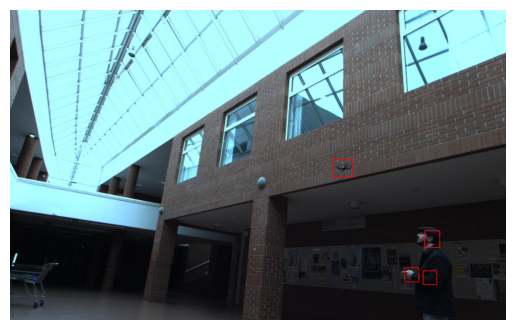

In [15]:
from sklearn.cluster import DBSCAN

def cluster_rectangles(rects, eps=30, min_samples=1):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rects)
    labels = clustering.labels_

    clustered_rects = []
    for label in set(labels):
        if label == -1:  # Ignore noise (outliers)
            continue

        # Find the minimum and maximum coordinates for each cluster
        cluster_rects = rects[labels == label]
        x1_min = np.min(cluster_rects[:, 0])
        y1_min = np.min(cluster_rects[:, 1])
        x2_max = np.max(cluster_rects[:, 2])
        y2_max = np.max(cluster_rects[:, 3])
        clustered_rects.append([x1_min, y1_min, x2_max, y2_max])

    return np.array(clustered_rects)
  

background_subtractor = cv2.createBackgroundSubtractorMOG2()

fig, ax = plt.subplots()

for path in frame_paths0[:10]:
    img = cv2.imread(path)
    
    fg_mask = background_subtractor.apply(img)
    _, thresh = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        rects.append([x, y, x + w, y + h])
    
    
    
    # Cluster close rectangles
    if len(rects) > 1:
        # add pixels to each side (margin)
        added = 100
        rects = np.array([[x1 - added//4, y1 - added//4, x2 + added//4, y2 + added//4] for x1, y1, x2, y2 in rects])
        rects[rects < 0] = 0 # if any of the coordinate became negative make it 0
        
         
        rects = nms(rects, probs=None, overlapThresh=0.2)
        rects = cluster_rectangles(rects, eps = 100)
    
    
    for (x1, y1, x2, y2) in rects:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    
    
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # To hide axis values
    display(fig)
    clear_output(wait=True)  # Clear output and wait for the next image
    plt.pause(0.01)  # Pause for 0.1 second

